In [32]:
# Let's first load the provided CSV file to understand its structure and contents for the EDA (Exploratory Data Analysis).
import pandas as pd

# Load the dataset
df = pd.read_csv('consumption_and_temperatures.csv')

# Display the first few rows of the dataframe to understand its structure and columns
df.head()


,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature
0,2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588,5.0,2674.838,5.5,2061.209,0.2,1609.089,3.9
1,2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209,4.1,2678.188,4.0,2045.436,0.1,1623.485,3.2
2,2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149,3.1,2678.341,3.7,2020.007,0.1,1634.128,2.7
3,2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042,2.3,2684.172,3.2,2021.920,0.1,1647.906,2.3
4,2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091,2.6,2733.345,2.7,2045.913,0.1,1679.176,2.3


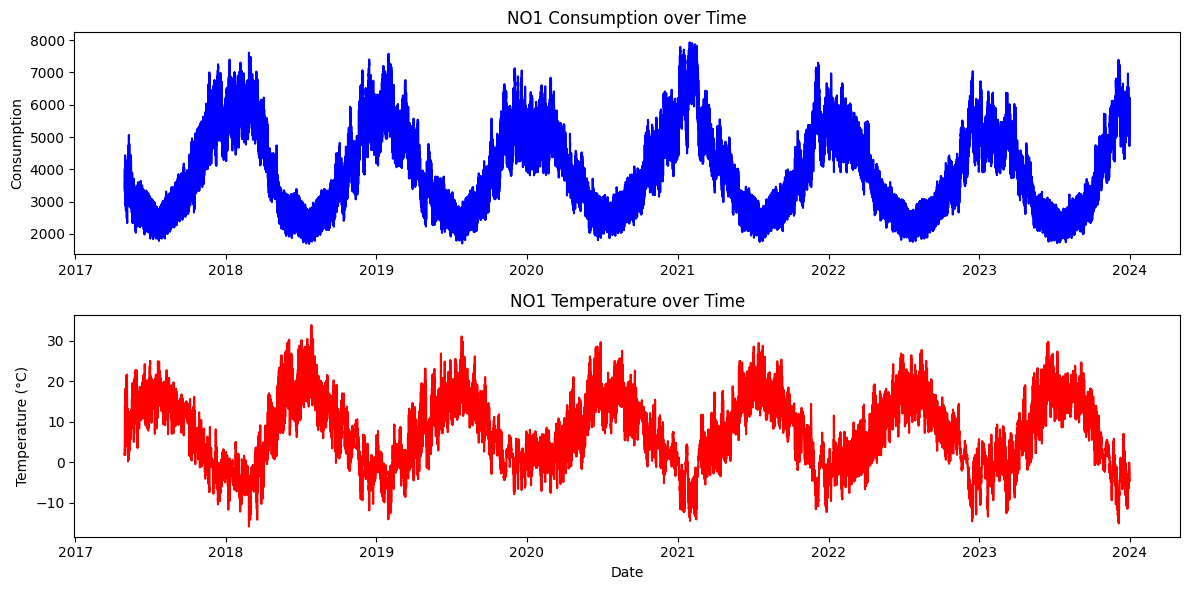

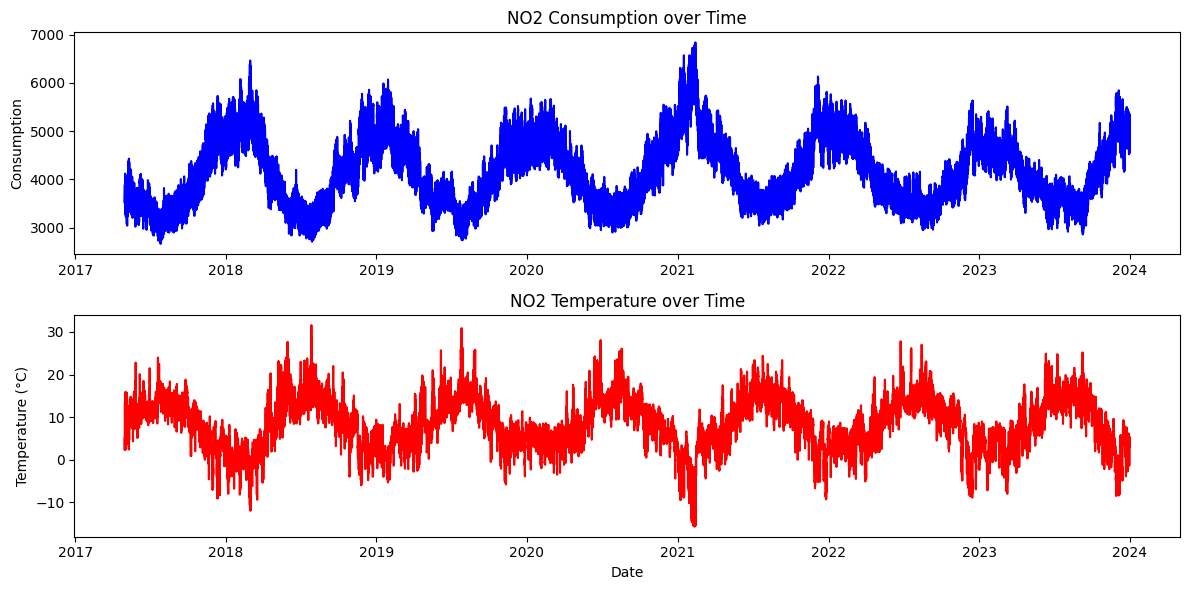

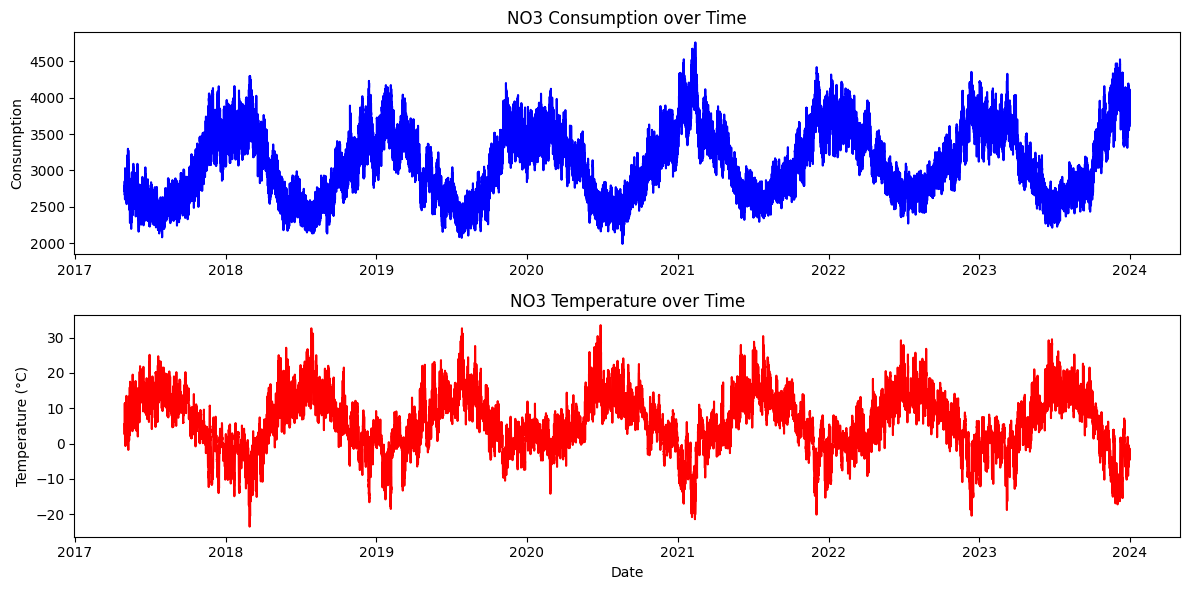

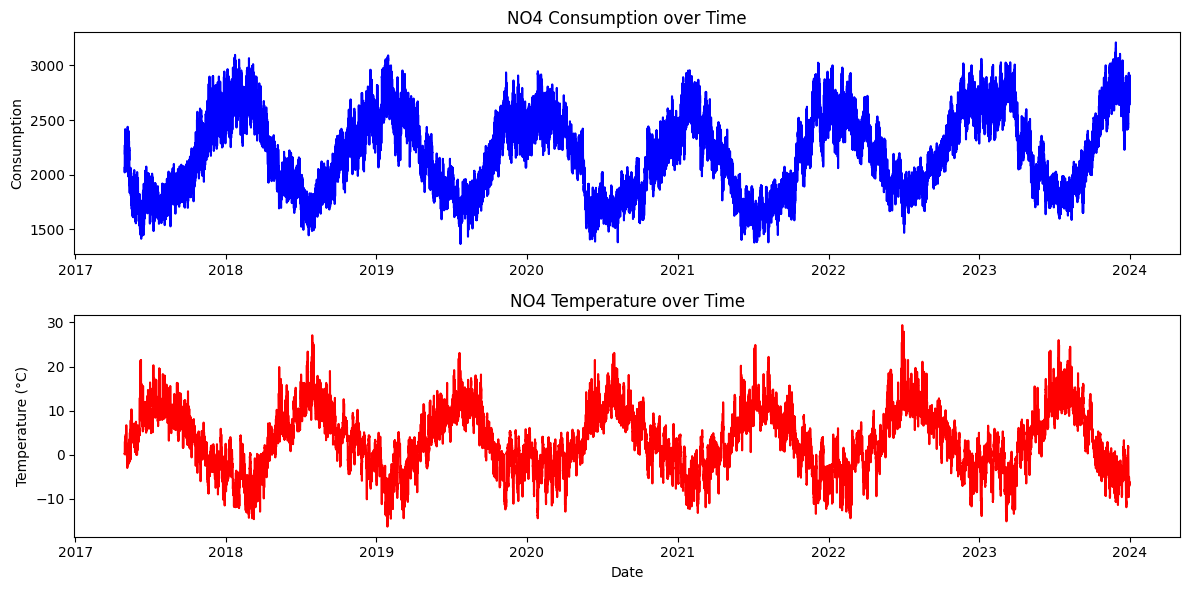

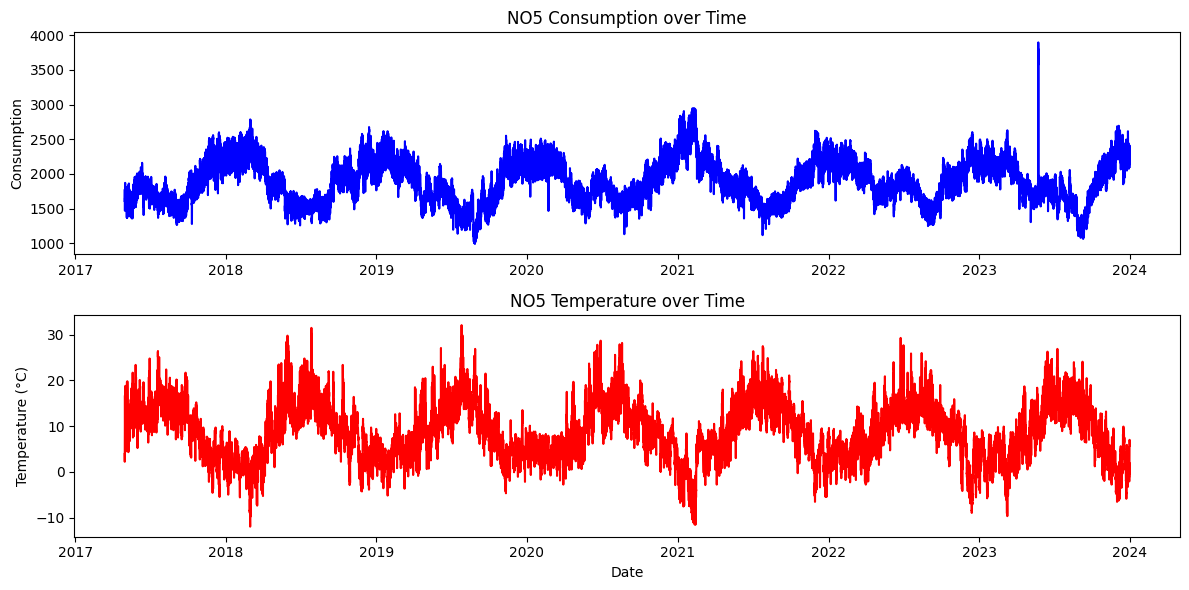

First date: 2017-05-01 00:00:00+00:00
Last date: 2023-12-31 23:00:00+00:00
Missing values:
NO1_consumption    0
NO1_temperature    0
NO2_consumption    0
NO2_temperature    0
NO3_consumption    0
NO3_temperature    0
NO4_consumption    0
NO4_temperature    0
NO5_consumption    0
NO5_temperature    0
dtype: int64


In [33]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime and set it as index for better analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Plotting trends in consumption and temperature for NO1 to NO5
for i in range(1, 6):
    consumption_col = f'NO{i}_consumption'
    temperature_col = f'NO{i}_temperature'
    
    plt.figure(figsize=(12, 6))

    # Consumption plot
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df[consumption_col], label=f'NO{i} Consumption', color='blue')
    plt.title(f'NO{i} Consumption over Time')
    plt.ylabel('Consumption')

    # Temperature plot
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df[temperature_col], label=f'NO{i} Temperature', color='red')
    plt.title(f'NO{i} Temperature over Time')
    plt.ylabel('Temperature (°C)')
    plt.xlabel('Date')

    plt.tight_layout()
    plt.show()

# Print first and last date
print(f"First date: {df.index[0]}")
print(f"Last date: {df.index[-1]}")

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

## Comment:
Here it looks like something crazy is happening in Nord-Norge in the middle of 2023. This could be fixed but since we only need 2 regions for this assignment, let's not use NO5...

## Feature Engineering

Following features are created in line with the assignment:
- time_of_day
- time_of_week
- time_of_year
- lag_1_hour
- lag_24_hours

The time features will be normalised and the lag features will be created after splitting the data set into it's regions. For now, the time of week is just the normalised weekday. Meaning, it doesn't include any hourly changes. The same goes for the time of year.

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Extracting time features
df['time_of_day'] = df.index.hour
df['time_of_week'] = df.index.dayofweek
df['time_of_year'] = df.index.dayofyear

# Normalizing the time features
timeScaler = MinMaxScaler()
time_features = ['time_of_day', 'time_of_week', 'time_of_year']
df[time_features] = timeScaler.fit_transform(df[time_features])

df.head()

,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature,time_of_day,time_of_week,time_of_year
timestamp,,,,,,,,,,,,,
2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588,5.0,2674.838,5.5,2061.209,0.2,1609.089,3.9,0.000000,0.0,0.328767
2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209,4.1,2678.188,4.0,2045.436,0.1,1623.485,3.2,0.043478,0.0,0.328767
2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149,3.1,2678.341,3.7,2020.007,0.1,1634.128,2.7,0.086957,0.0,0.328767
2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042,2.3,2684.172,3.2,2021.920,0.1,1647.906,2.3,0.130435,0.0,0.328767
2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091,2.6,2733.345,2.7,2045.913,0.1,1679.176,2.3,0.173913,0.0,0.328767


In [35]:
# Splitting the data into its 5 locations
NO1 = df[['NO1_consumption', 'NO1_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO2 = df[['NO2_consumption', 'NO2_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO3 = df[['NO3_consumption', 'NO3_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO4 = df[['NO4_consumption', 'NO4_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()
NO5 = df[['NO5_consumption', 'NO5_temperature', 'time_of_day', 'time_of_week', 'time_of_year']].copy()

# Renaming the columns for each location
NO1.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO2.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO3.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO4.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']
NO5.columns = ['consumption', 'temperature', 'time_of_day', 'time_of_week', 'time_of_year']

In [36]:
# Splitting the data into training, validation, and test sets
""" The year 2023 will be the test set,
2022 will be the validation set,
and the rest will be the training set. """

# Splitting the data into training, validation, and test sets
NO1_train, NO1_val, NO1_test = NO1[:'2021-12-31'].copy(), NO1['2022-01-01':'2022-12-31'].copy(), NO1['2023-01-01':].copy()
NO2_train, NO2_val, NO2_test = NO2[:'2021-12-31'].copy(), NO2['2022-01-01':'2022-12-31'].copy(), NO2['2023-01-01':].copy()
NO3_train, NO3_val, NO3_test = NO3[:'2021-12-31'].copy(), NO3['2022-01-01':'2022-12-31'].copy(), NO3['2023-01-01':].copy()
NO4_train, NO4_val, NO4_test = NO4[:'2021-12-31'].copy(), NO4['2022-01-01':'2022-12-31'].copy(), NO4['2023-01-01':].copy()
NO5_train, NO5_val, NO5_test = NO5[:'2021-12-31'].copy(), NO5['2022-01-01':'2022-12-31'].copy(), NO5['2023-01-01':].copy()

# Checking the percentual length of the sets
print(f"Training set length: {100*len(NO1_train)/len(NO1):.2f}%")
print(f"Validation set length: {100*len(NO1_val)/len(NO1):.2f}%")
print(f"Test set length: {100*len(NO1_test)/len(NO1):.2f}%")

Training set length: 70.03%
Validation set length: 14.98%
Test set length: 14.98%


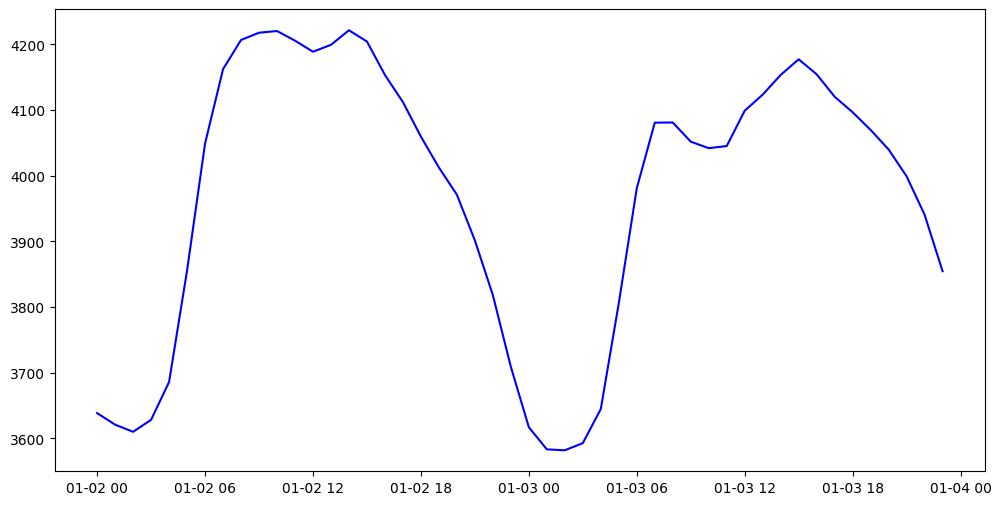

In [37]:
# Plot the first 48 hours of the test set for NO3
plt.figure(figsize=(12, 6))
plt.plot(NO3_test.index[24:72], NO3_test['consumption'][24:72], label='Consumption', color='blue')

## Normalisation

In [38]:
from sklearn.preprocessing import MinMaxScaler
import joblib

tempScaler = MinMaxScaler()

# Scale the temperature data of the datasets
NO1_train['temperature'] = tempScaler.fit_transform(NO1_train[['temperature']])
NO1_val['temperature'] = tempScaler.transform(NO1_val[['temperature']])
NO1_test['temperature'] = tempScaler.transform(NO1_test[['temperature']])
NO2_train['temperature'] = tempScaler.fit_transform(NO2_train[['temperature']])
NO2_val['temperature'] = tempScaler.transform(NO2_val[['temperature']])
NO2_test['temperature'] = tempScaler.transform(NO2_test[['temperature']])
NO3_train['temperature'] = tempScaler.fit_transform(NO3_train[['temperature']])
NO3_val['temperature'] = tempScaler.transform(NO3_val[['temperature']])
NO3_test['temperature'] = tempScaler.transform(NO3_test[['temperature']])
NO4_train['temperature'] = tempScaler.fit_transform(NO4_train[['temperature']])
NO4_val['temperature'] = tempScaler.transform(NO4_val[['temperature']])
NO4_test['temperature'] = tempScaler.transform(NO4_test[['temperature']])
NO5_train['temperature'] = tempScaler.fit_transform(NO5_train[['temperature']])
NO5_val['temperature'] = tempScaler.transform(NO5_val[['temperature']])
NO5_test['temperature'] = tempScaler.transform(NO5_test[['temperature']])


NO1scaler = MinMaxScaler()
NO2scaler = MinMaxScaler()
NO3scaler = MinMaxScaler()
NO4scaler = MinMaxScaler()
NO5scaler = MinMaxScaler()

# Scale the consumption data of the datasets
NO1_train['consumption'] = NO1scaler.fit_transform(NO1_train[['consumption']])
NO1_val['consumption'] = NO1scaler.transform(NO1_val[['consumption']])
NO1_test['consumption'] = NO1scaler.transform(NO1_test[['consumption']])
NO2_train['consumption'] = NO2scaler.fit_transform(NO2_train[['consumption']])
NO2_val['consumption'] = NO2scaler.transform(NO2_val[['consumption']])
NO2_test['consumption'] = NO2scaler.transform(NO2_test[['consumption']])
NO3_train['consumption'] = NO3scaler.fit_transform(NO3_train[['consumption']])
NO3_val['consumption'] = NO3scaler.transform(NO3_val[['consumption']])
NO3_test['consumption'] = NO3scaler.transform(NO3_test[['consumption']])
NO4_train['consumption'] = NO4scaler.fit_transform(NO4_train[['consumption']])
NO4_val['consumption'] = NO4scaler.transform(NO4_val[['consumption']])
NO4_test['consumption'] = NO4scaler.transform(NO4_test[['consumption']])
NO5_train['consumption'] = NO5scaler.fit_transform(NO5_train[['consumption']])
NO5_val['consumption'] = NO5scaler.transform(NO5_val[['consumption']])
NO5_test['consumption'] = NO5scaler.transform(NO5_test[['consumption']])

# Save the scaler
joblib.dump(NO1scaler, 'preprocessed_datasets/NO1scaler.pkl')
joblib.dump(NO2scaler, 'preprocessed_datasets/NO2scaler.pkl')
joblib.dump(NO3scaler, 'preprocessed_datasets/NO3scaler.pkl')
joblib.dump(NO4scaler, 'preprocessed_datasets/NO4scaler.pkl')
joblib.dump(NO5scaler, 'preprocessed_datasets/NO5scaler.pkl')

['preprocessed_datasets/NO5scaler.pkl']

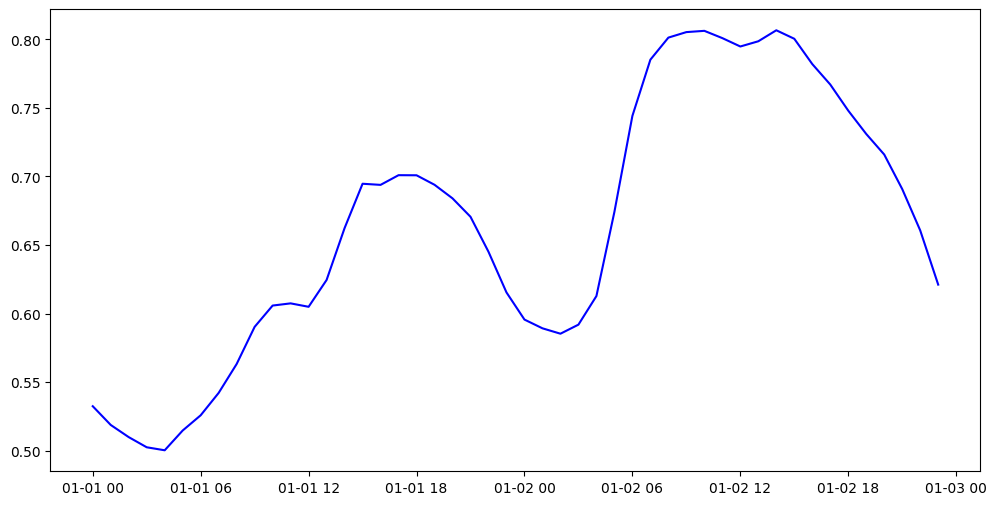

In [39]:
# Plot the first 48 hours of the test set for NO3
plt.figure(figsize=(12, 6))
plt.plot(NO3_test.index[:48], NO3_test['consumption'][:48], label='Consumption', color='blue')

In [40]:
# Add the features lag_1_hour and lag_24_hours to the datasets
def add_lag_features(df):
    df.loc[:, 'lag_24_hours'] = df['consumption'].shift(24)
    df.loc[:, 'lag_1_hour'] = df['consumption'].shift(1)
    # Remove the first 24h rows with NaN values created by shifting
    df.dropna(inplace=True)

add_lag_features(NO1_train)
add_lag_features(NO1_val)
add_lag_features(NO1_test)
add_lag_features(NO2_train)
add_lag_features(NO2_val)
add_lag_features(NO2_test)
add_lag_features(NO3_train)
add_lag_features(NO3_val)
add_lag_features(NO3_test)
add_lag_features(NO4_train)
add_lag_features(NO4_val)
add_lag_features(NO4_test)
add_lag_features(NO5_train)
add_lag_features(NO5_val)
add_lag_features(NO5_test)

NO1_train.head()

,consumption,temperature,time_of_day,time_of_week,time_of_year,lag_24_hours,lag_1_hour
timestamp,,,,,,,
2017-05-02 00:00:00+00:00,0.243640,0.380282,0.000000,0.166667,0.331507,0.262138,0.245651
2017-05-02 01:00:00+00:00,0.250336,0.368209,0.043478,0.166667,0.331507,0.265225,0.243640
2017-05-02 02:00:00+00:00,0.263287,0.368209,0.086957,0.166667,0.331507,0.273828,0.250336
2017-05-02 03:00:00+00:00,0.287778,0.356137,0.130435,0.166667,0.331507,0.278935,0.263287
2017-05-02 04:00:00+00:00,0.370562,0.360161,0.173913,0.166667,0.331507,0.307231,0.287778


In [41]:
# Save the 15 preprocessed datasets to CSV files
NO1_train.to_csv('preprocessed_datasets/NO1_train.csv')
NO1_val.to_csv('preprocessed_datasets/NO1_val.csv')
NO1_test.to_csv('preprocessed_datasets/NO1_test.csv')

NO2_train.to_csv('preprocessed_datasets/NO2_train.csv')
NO2_val.to_csv('preprocessed_datasets/NO2_val.csv')
NO2_test.to_csv('preprocessed_datasets/NO2_test.csv')

NO3_train.to_csv('preprocessed_datasets/NO3_train.csv')
NO3_val.to_csv('preprocessed_datasets/NO3_val.csv')
NO3_test.to_csv('preprocessed_datasets/NO3_test.csv')

NO4_train.to_csv('preprocessed_datasets/NO4_train.csv')
NO4_val.to_csv('preprocessed_datasets/NO4_val.csv')
NO4_test.to_csv('preprocessed_datasets/NO4_test.csv')

NO5_train.to_csv('preprocessed_datasets/NO5_train.csv')
NO5_val.to_csv('preprocessed_datasets/NO5_val.csv')
NO5_test.to_csv('preprocessed_datasets/NO5_test.csv')

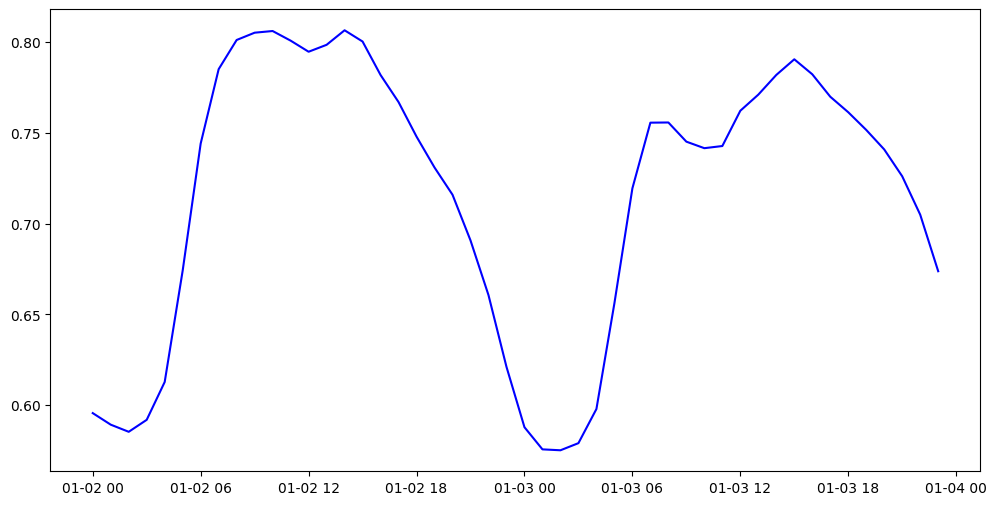

In [42]:
# Plot the first 48 hours of the test set for NO3
plt.figure(figsize=(12, 6))
plt.plot(NO3_test.index[:48], NO3_test['consumption'][:48], label='Consumption', color='blue')